说明：
使用iris数据


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:,0:2]
y = iris.target

In [5]:
n_features = X.shape[1]

In [6]:
print(n_features)

2


In [7]:
for key, value in iris.items():
    try:
        print(key, value.shape)
    except:
        print(key)

data (150, 4)
target (150,)
target_names (3,)
DESCR
feature_names


### model selection 

1. L1 logistic
2. L2 logistic(OvR)
3. Linear SVC
4. L2 logistic(Multinomial)

In [8]:
C = 1.0

In [9]:
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
              'L2 logistic(OvR)': LogisticRegression(C=C,penalty='l2'),
              'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
              'L2 logistic(Multinomial)': LogisticRegression(C=C, solver='lbfgs',multi_class='multinomial')}
n_classifiers = len(classifiers)

需要用到以下
1. np.linspace()来设置区间。
2. np.meshgrid(xx, yy)来产生网格坐标。
3. numpy.c_将numpy矩阵连接起来。

In [10]:
xx, yy = np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3).T)
Xfull = np.c_[xx.ravel(), yy.ravel()]
print('xx= \n%s\n' % xx)
print('yy= \n%s\n' % yy)
print('xx.ravel()= %s\n' % xx.ravel())
print('yy.ravel()= %s\n' % yy.ravel())
print('Xfull= \n%s' % Xfull)

xx= 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

yy= 
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

xx.ravel()= [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]

yy.ravel()= [ 4.  4.  4.  5.  5.  5.  6.  6.  6.]

Xfull= 
[[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]


In [11]:
#对iris数据进行处理并作图
plt.figure(figsize=(3*2, n_classifiers*2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3,9,100)
yy = np.linspace(1,5,100).T
xx,yy = np.meshgrid(xx,yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

### 测试分类器并画出概率 

classif_rate for L1 logistic: 79.333333
classif_rate for L2 logistic(OvR): 76.666667
classif_rate for Linear SVC: 82.000000
classif_rate for L2 logistic(Multinomial): 82.000000


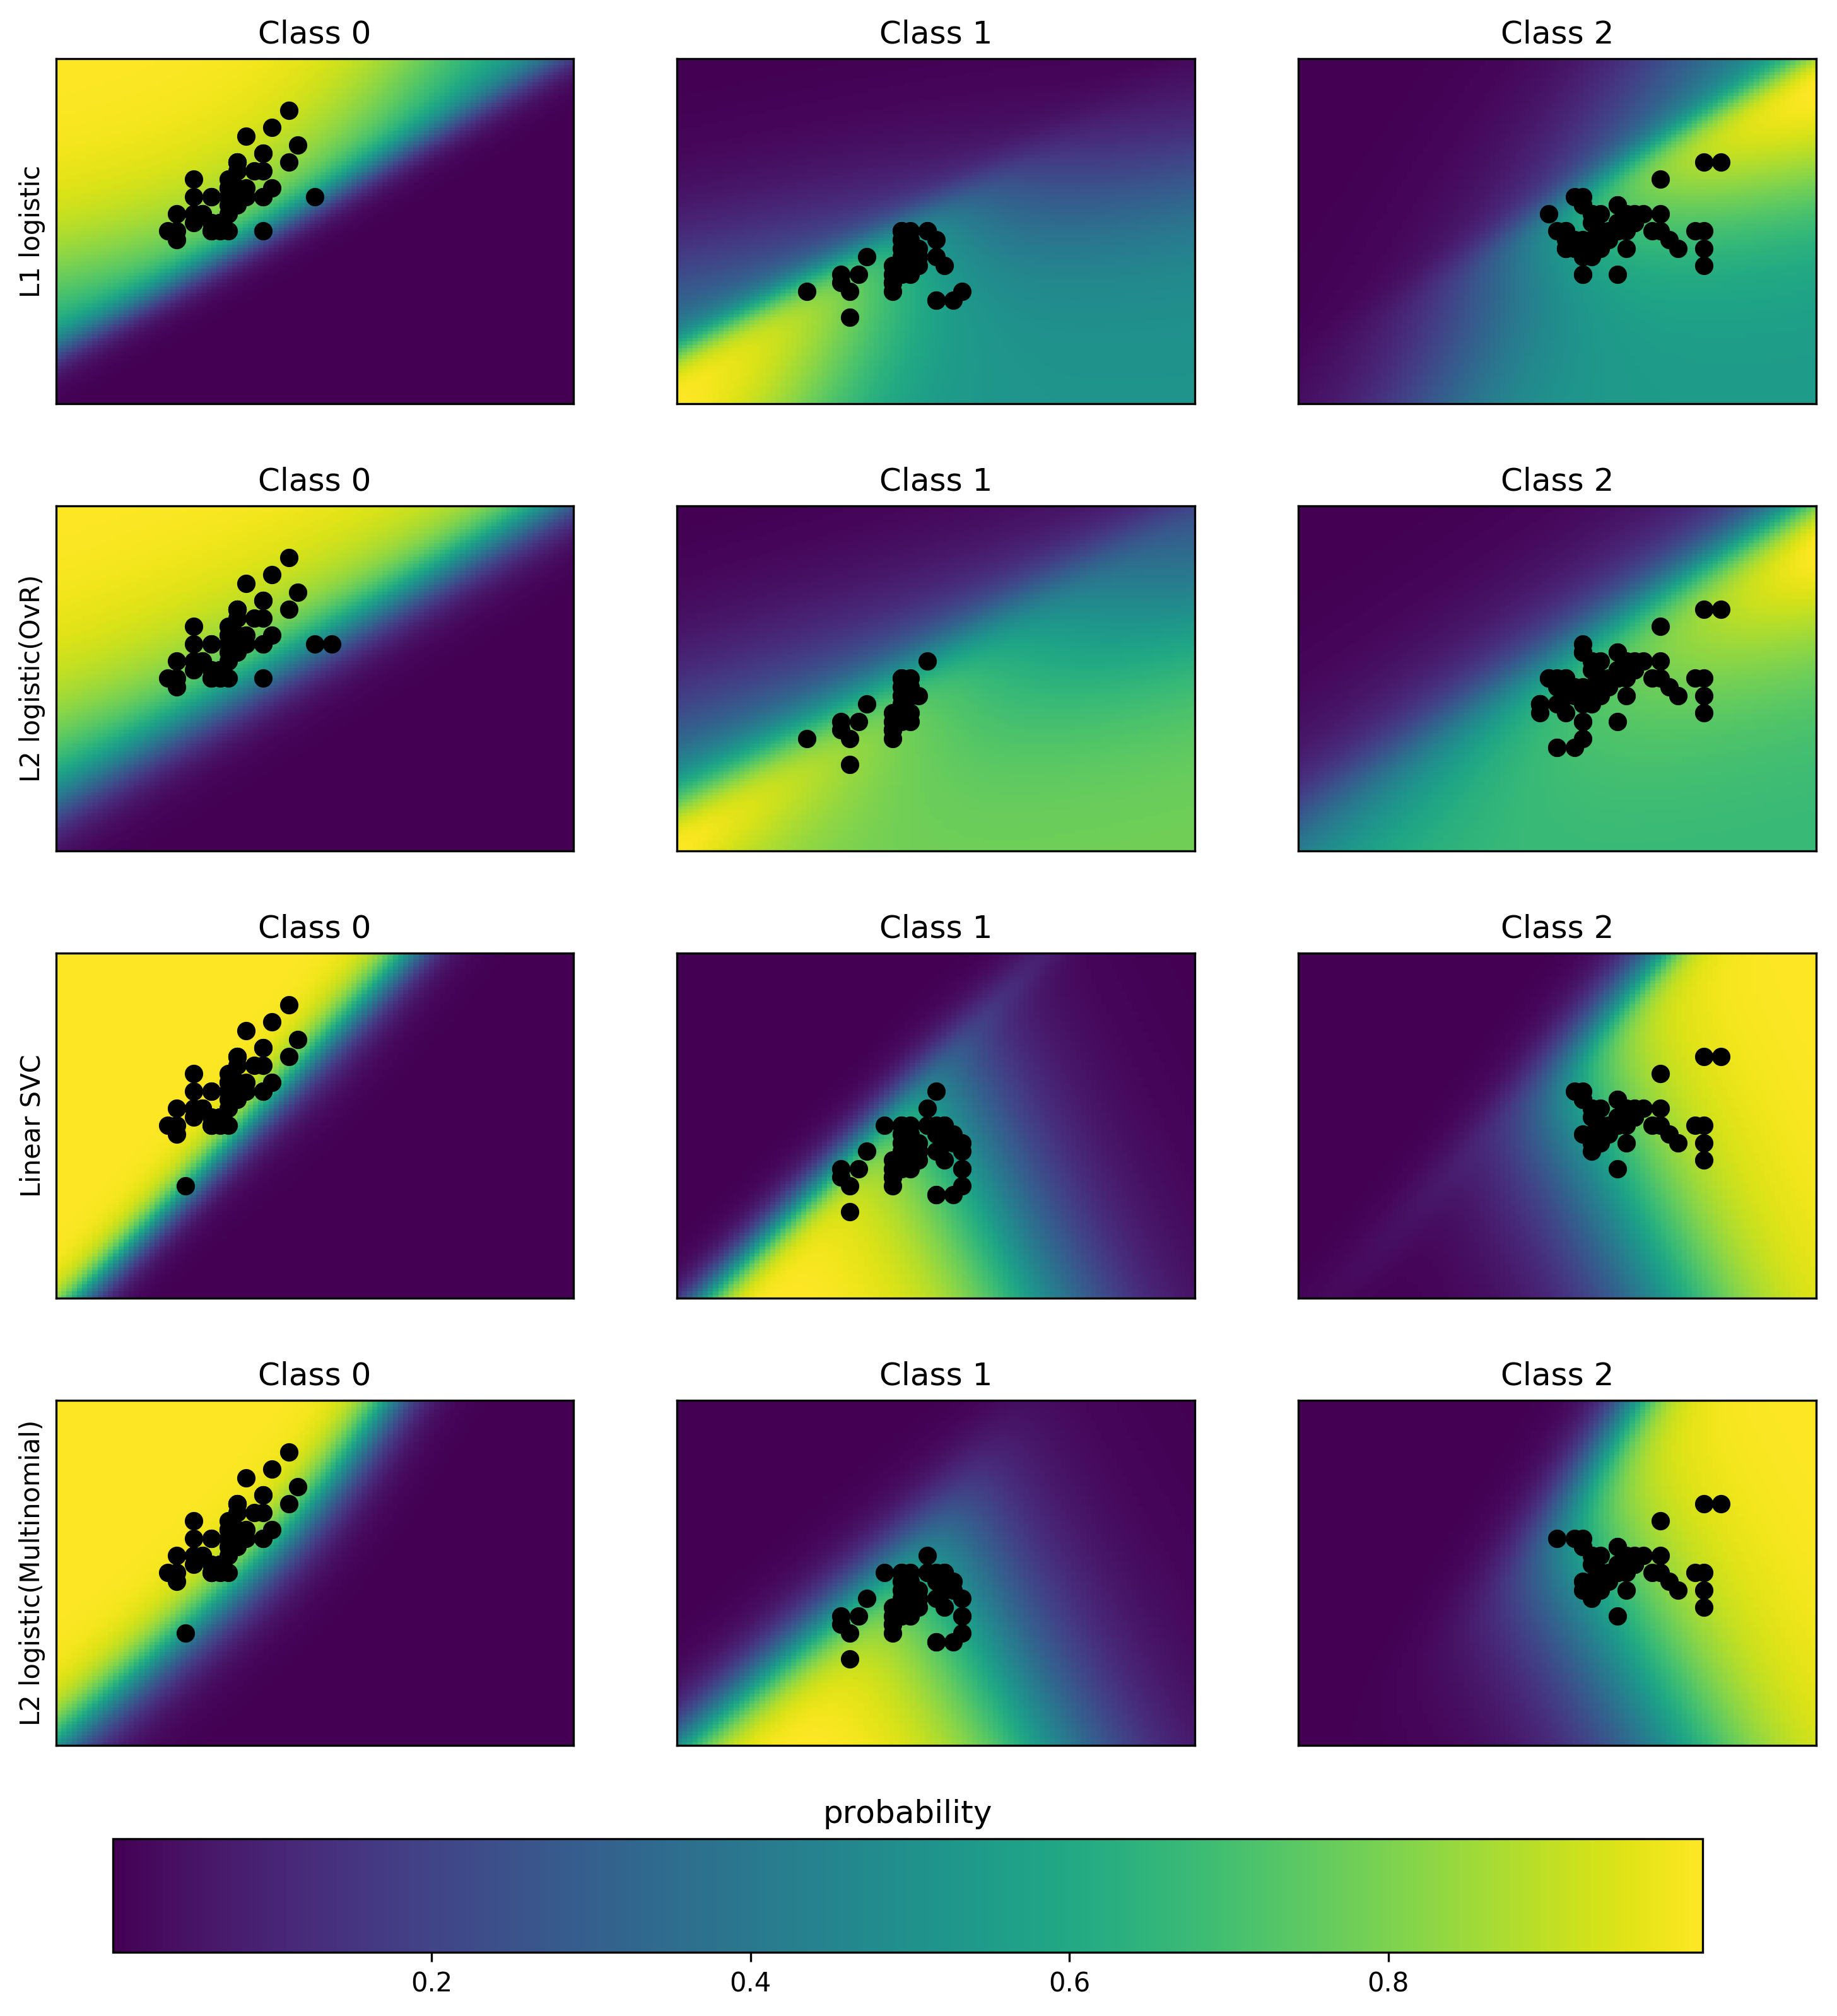

In [13]:
fig = plt.figure(figsize =(12,12), dpi=300)
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X,y)
    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel()==y.ravel())*100
    print("classif_rate for %s: %f" % (name, classif_rate))
    
    #View probability
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index*n_classes + k +1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:,k].reshape((100,100)),extent = (3, 9, 1, 5), 
                                   origin = 'lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker = 'o', c = 'k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("probability")
plt.colorbar(imshow_handle, cax = ax, orientation = 'horizontal')

plt.show()